### Time Series on Company Stock and Investment

In [4]:
import pandas as pd
df=pd.read_csv("Company Stock and Investment.csv")

In [5]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [6]:
df.shape

(1984, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
Date                       1984 non-null object
Oil Investments            1984 non-null float64
Gold Investments           1984 non-null float64
Comp Stock                 1984 non-null float64
Other sharesInvestments    1984 non-null float64
dtypes: float64(4), object(1)
memory usage: 77.6+ KB


In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [10]:
import matplotlib.pyplot as plt

In [11]:
df.isnull().sum()
# There are no null data

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

D:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


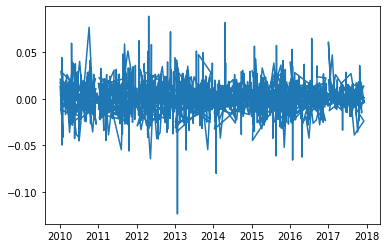

In [12]:
plt.plot(df['Date'], df['Comp Stock'])

From plots we are not able to understand the trend of the data clearly as it is date wise. We will have to group it yearly wise to understand trend

##### Creating different dataframes for different investments

#### Computer stock observations

In [13]:
df_comp=df[['Date','Comp Stock']]

In [14]:
df_comp.reset_index(inplace=True)

In [15]:
df_comp.head()

,index,Date,Comp Stock
0,0,2009-12-31,0.017354
1,1,2010-04-01,0.015565
2,2,2010-05-01,0.001729
3,3,2010-06-01,-0.015906
4,4,2010-07-01,-0.001849


In [16]:
comp_group=df_comp.groupby(df_comp['Date'].dt.strftime('%Y'))['Comp Stock'].sum()
comp_group

Date
2009    0.017354
2010    0.461616
2011    0.262028
2012    0.316002
2013    0.094057
2014    0.343711
2015   -0.011884
2016    0.122873
2017    0.392522
Name: Comp Stock, dtype: float64

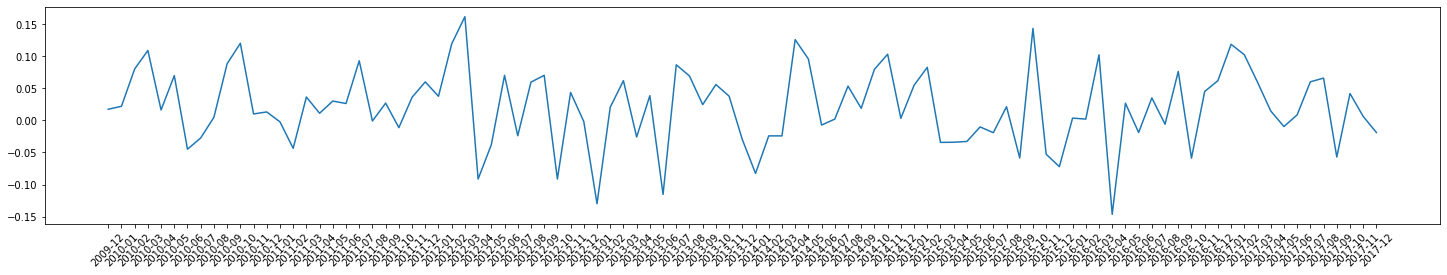

In [17]:
comp_group=df_comp.groupby(df_comp['Date'].dt.strftime('%Y-%m'))['Comp Stock'].sum()

comp_group
plt.figure(figsize=(25,4))
plt.plot(comp_group)

plt.tick_params(axis='x',rotation=45)

##### Observations for the Computer stock
1. The stock price and investment in computers have seen lot of fluctuations during the years.

##### Checking the stationarity of the data
We need to check the stationarity of the data by visual method of rolling mean and rolling standard deviation and by Dickey Fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.DataFrame.rolling(timeseries, window=12).mean()
    rolstd = pd.DataFrame.rolling(timeseries, window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [19]:
## testing for stationarity in Comp stock data 

In [20]:
comp_group=pd.DataFrame(comp_group)
#.reset_index(inplace=True)
comp_group.reset_index(inplace=True)
comp_group

,Date,Comp Stock
0,2009-12,0.017354
1,2010-01,0.021966
2,2010-02,0.080202
3,2010-03,0.108993
4,2010-04,0.016247
...,...,...
92,2017-08,0.065951
93,2017-09,-0.057154
94,2017-10,0.041893
95,2017-11,0.006212


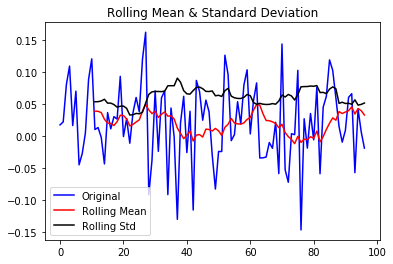

Results of Dickey-Fuller Test:
Test Statistic                -9.792480e+00
p-value                        6.299651e-17
#Lags Used                     0.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64


In [21]:
test_stationarity(comp_group['Comp Stock'])


#### Observations from the graph and test data
1. The rolling mean and rolling standard deviation shows that the data was not uniform.
2. Since p value is less than 0.5, we can are rejecting the null hypothesis and concluding that the data is stationary

In [22]:
#!pip install statsmodels

##### Finding out the p,q,d value using acf and pacf graphs

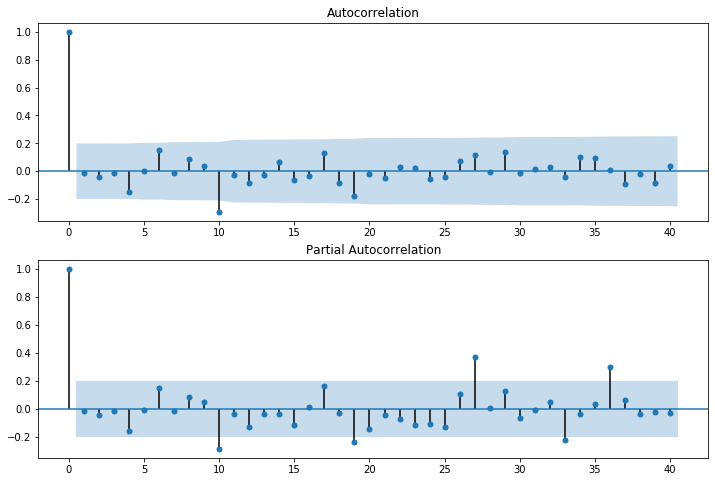

In [23]:

import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=statsmodels.graphics.tsaplots.plot_acf(comp_group['Comp Stock'],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=statsmodels.graphics.tsaplots.plot_pacf(comp_group['Comp Stock'],lags=40,ax=ax2)

#### Determining the values from above graph
1. p value is 1 derived by observing Partial Autocorrelation. The value has dropped suddenly, shut down, from top at x axis at 1.
2. q value is 1 derived by observing Autocorrelation. The value has not dropped gradually, but suddenly at 1 on x axis.
3. d value is 0 as we have not done any removing of seasonality

#### Fitting the SARIMAX model

In [24]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm # for sarimax

In [25]:
model=sm.tsa.statespace.SARIMAX(comp_group['Comp Stock'],order=(1,0,1),seasonal_order=(1,0,1,12)) # this order is p, d and q
model_fit=model.fit()

In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Comp Stock   No. Observations:                   97
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 133.903
Date:                            Thu, 22 Oct 2020   AIC                           -257.807
Time:                                    18:25:05   BIC                           -244.933
Sample:                                         0   HQIC                          -252.602
                                             - 97                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.006    162.315      0.000       0.988       1.012
ma.L1         -0.9954      0.174     -5.725      0.000      -1.336      -0.655
ar.S.L12       0.2072      1.259      0.165      0.869      -2.260       2.675
ma.S.L12      -0.3015      1.244     -0.242      0.809      -2.740       2.137
sigma2         0.0036      0.001      5.155      0.000       0.002       0.005
===================================================================================
Ljung-Box (Q):                       34.41   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.72   Prob(JB):                         0.51
Heteroskedasticity (H):               1.16   Skew:                            -0.28
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
comp_group.shape

(97, 2)

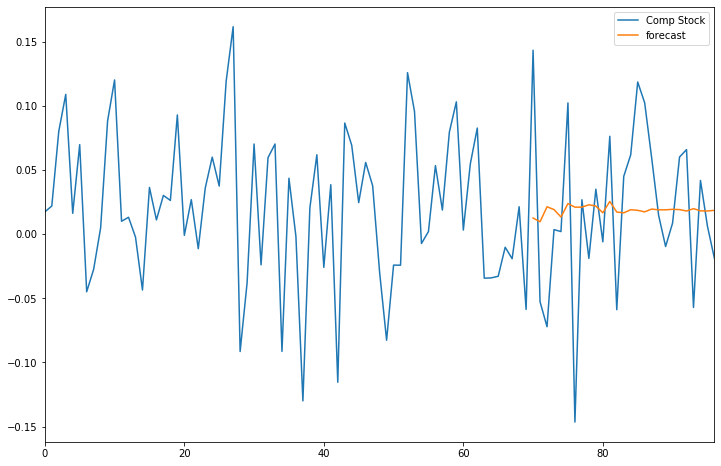

In [28]:
comp_group['forecast']=model_fit.predict(start=70,end=97,dynamic=True)
comp_group[['Comp Stock','forecast']].plot(figsize=(12,8))

#### Observations
1. The SARIMAX model is not giving good accuracy
2. Lets try to remove irregularity of data using difference and fit the both ARIMA and SARIMAX model and compare

#### Removing irregularities of the data

In [32]:
##### let's try removing irregularities from the data
comp_group['First Difference']=comp_group['Comp Stock']-comp_group['Comp Stock'].shift(1)
comp_group['Seasonal Difference']=comp_group['Comp Stock']-comp_group['Comp Stock'].shift(12)

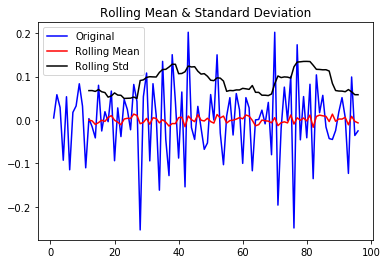

Results of Dickey-Fuller Test:
Test Statistic                 -4.139025
p-value                         0.000834
#Lags Used                      8.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [35]:
## Again test dickey fuller test
test_stationarity(comp_group['First Difference'].dropna())

D:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


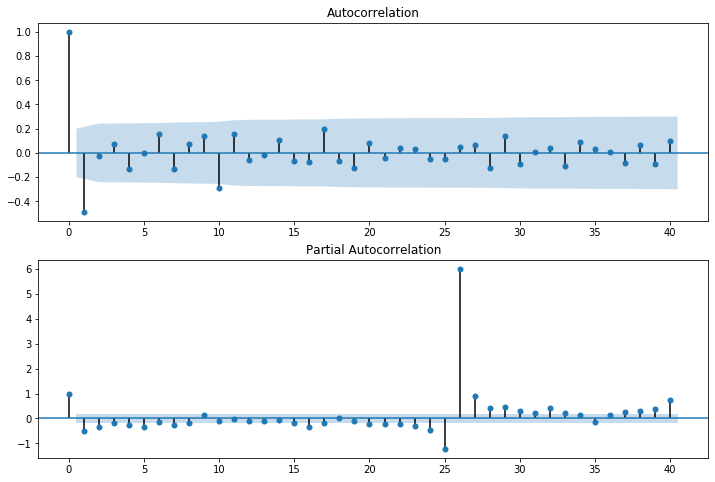

In [36]:

import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=statsmodels.graphics.tsaplots.plot_acf(comp_group['First Difference'].iloc[1:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=statsmodels.graphics.tsaplots.plot_pacf(comp_group['First Difference'].iloc[1:],lags=40,ax=ax2)

In [37]:
model=ARIMA(comp_group['Comp Stock'],order=(1,1,1)) # this order is p, d and q
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 131.281
Method:                       css-mle   S.D. of innovations              0.060
Date:                Thu, 22 Oct 2020   AIC                           -254.562
Time:                        18:27:50   BIC                           -244.304
Sample:                             1   HQIC                          -250.415
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0002      0.000     -0.694      0.490      -0.001       0.000
ar.L1.D.Comp Stock    -0.0063      0.102     -0.061      0.951      -0.207       0.194
ma.L1.D.Comp Stock    -1.0000      0.030    -33.255      0.000      -1.059      -0.941
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -159.4763           +0.0000j          159.4763            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

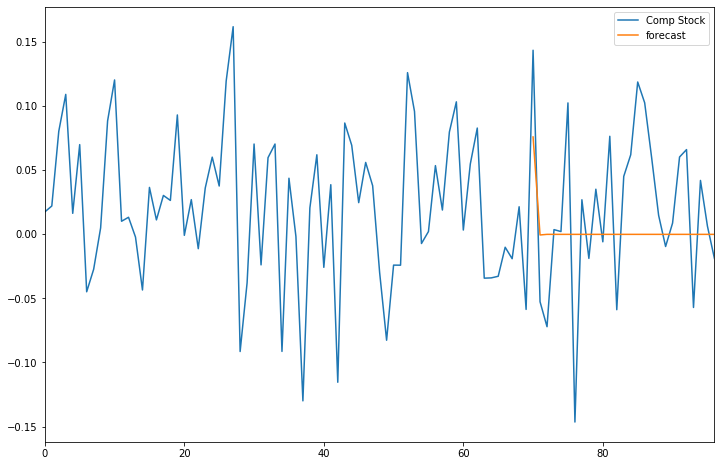

In [38]:
comp_group['forecast']=model_fit.predict(start=70,end=97,dynamic=True)
comp_group[['Comp Stock','forecast']].plot(figsize=(12,8))

In [39]:
# ARIMA doesn't seem like working as a good model

In [40]:
# lets try SARIMAX again
model=sm.tsa.statespace.SARIMAX(comp_group['Comp Stock'],order=(1,1,1),seasonal_order=(1,1,1,12)) # this order is p, d and q
model_fit=model.fit()

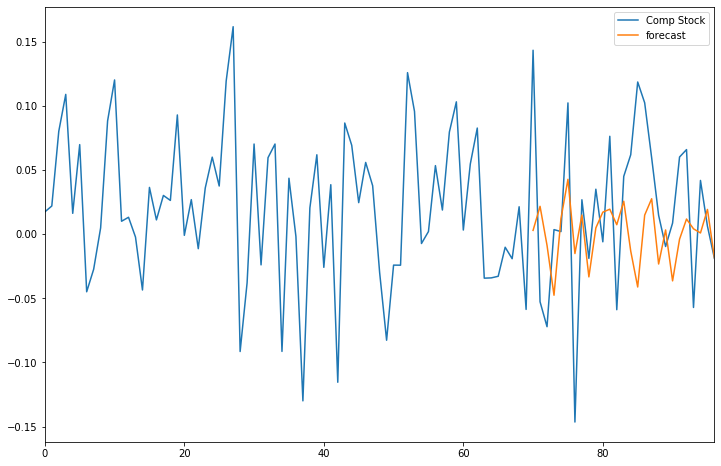

In [41]:
comp_group['forecast']=model_fit.predict(start=70,end=97,dynamic=True)
comp_group[['Comp Stock','forecast']].plot(figsize=(12,8))

In [42]:
# after removing irregularity, SARIMAX is working better

In [44]:
# creating some data to predict future of this
from pandas.tseries.offsets import DateOffset

comp_group['Date']=pd.to_datetime(comp_group['Date'])
future_dates=[comp_group.iloc[-1,0]+ DateOffset(months=x)for x in range(0,37)]
future_dates_df=pd.DataFrame(index=future_dates[1:])#,columns=gold_group.columns)
future_dates_df.reset_index(inplace=True)
future_dates_df.rename(columns={'index':'Date'},inplace=True)
future_dates_df

,Date
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


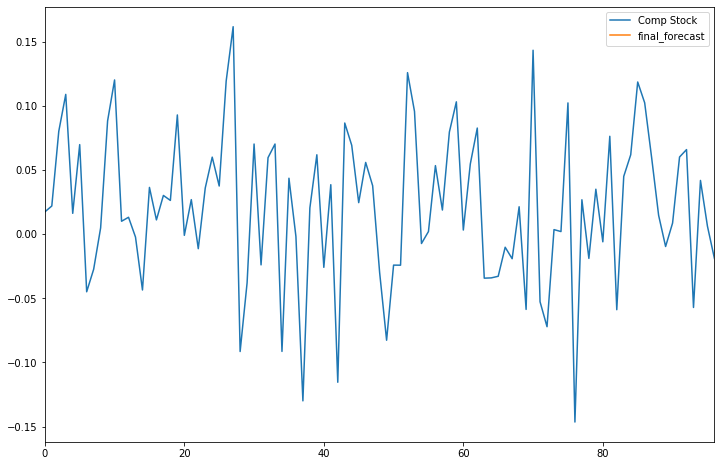

In [45]:
from datetime import datetime
future_dates_df['Date']=future_dates_df['Date'].dt.strftime('%m-%Y')
future_df=pd.concat([comp_group,future_dates_df])
future_df['final_forecast']=model_fit.predict(start=98,end=133)
future_df[['Comp Stock','final_forecast']].plot(figsize=(12,8))